In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots
import seaborn as sns
plt.style.use('science')
plt.rcParams['figure.figsize'] = (6, 7)
plt.rcParams['font.size'] = 14
from neutrons.process.data_processor import TotalProcessor, AbsorptionProcessor


H_data_a = pd.read_csv('../data/h_cross_a.txt',sep=r'\s+')
H_data_t = pd.read_csv('../data/h_cross_t.txt',sep=r'\s+')
H_data_s = pd.read_csv('../data/h_cross_s.txt',sep=r'\s+')

O_data_a = pd.read_csv('../data/o_cross_a.txt',sep=r'\s+')
O_data_t = pd.read_csv('../data/o_cross_t.txt',sep=r'\s+')
O_data_s = pd.read_csv('../data/o_cross_s.txt',sep=r'\s+')
processor = TotalProcessor([H_data_t, O_data_t])

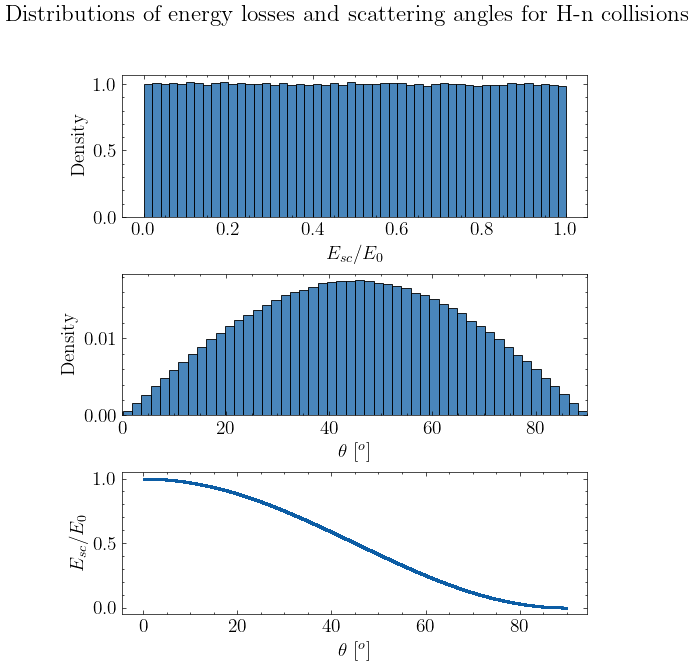

In [140]:
E0 = 1
energies_H = E0 * np.random.random(1000000)
thetas = np.degrees(np.arccos(np.sqrt(energies_H / E0)))

fig, axs = plt.subplots(3, 1)
fig.subplots_adjust(hspace=0.4)

fig.suptitle("Distributions of energy losses and scattering angles for H-n collisions")
sns.histplot(energies_H, bins=50,stat='density', color='C0', ax=axs[0])
axs[0].set_xlabel(r'$E_{sc} / E_0 $')
axs[0].set_ylabel("Density")

sns.histplot(thetas, bins=50,stat='density', color='C0', ax=axs[1])
axs[1].set_xlabel(r'$\theta \ [^o]$')
axs[1].set_ylabel("Density")
axs[1].set_xlim(0, 90)

axs[2].plot(thetas, energies_H, 'o', markersize=1, color='C0')
axs[2].set_ylabel(r'$E_{sc} / E_0 $')
axs[2].set_xlabel(r'$\theta \ [^o]$')

plt.show()

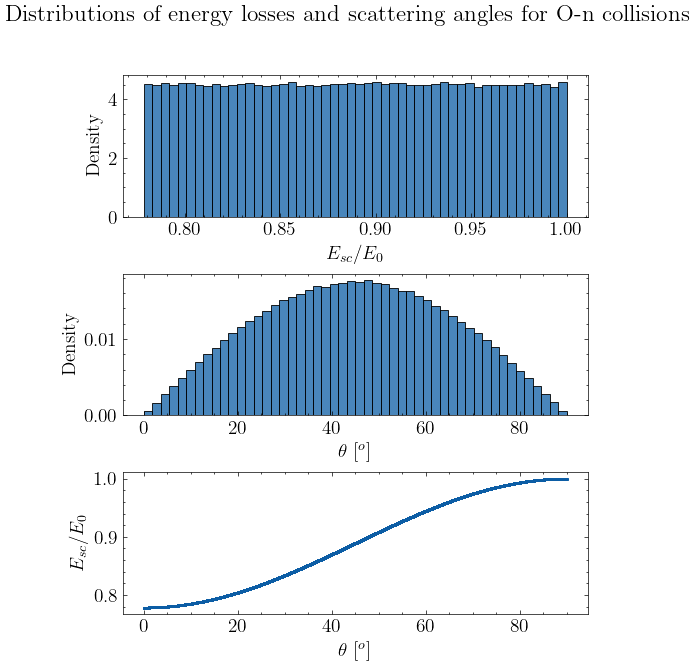

In [139]:
E0 = 1
A = 16
E_min = ((A-1)/(A+1))**2*E0

energies_O = np.random.uniform(E_min, E0, 1000000)

thetas = np.degrees(np.arccos(np.sqrt( ((1+A)**2 / (4*A) )* (E0 - energies_O) / (E0))))

fig, axs = plt.subplots(3, 1)
fig.subplots_adjust(hspace=0.4)

fig.suptitle("Distributions of energy losses and scattering angles for O-n collisions")
sns.histplot(energies_O, bins=50,stat='density', color='C0', ax=axs[0])
axs[0].set_xlabel(r'$E_{sc} / E_0 $')
axs[0].set_ylabel("Density")

sns.histplot(thetas, bins=50,stat='density', color='C0', ax=axs[1])
axs[1].set_xlabel(r'$\theta \ [^o]$')
axs[1].set_ylabel("Density")
#axs[1].set_xlim(0, 90)

axs[2].plot(thetas, energies_O, 'o', markersize=1, color='C0')
axs[2].set_ylabel(r'$E_{sc} / E_0 $')
axs[2].set_xlabel(r'$\theta \ [^o]$')

plt.show()

In [202]:
nCollisions = []
for _ in range(100):
    E = 2*10**6
    thetas = []

    n = 0
    while E > 2:
        if np.random.random() < processor.get_ratio(E):
            # H collision
            E_new =E* energies_H[np.random.randint(0, len(energies_H))]
            thetas.append(np.arccos(np.sqrt(E_new / E)))

        else:
            # O collision
            E_new = E* energies_O[np.random.randint(0, len(energies_O))]
            thetas.append(np.arccos(np.sqrt( ((1+A)**2 / (4*A) )* (E - E_new) / (E))))
        n += 1
    
        E = E_new
    
    nCollisions.append(n)

print(f" <no. collisions> = {np.mean(nCollisions)}")
xi = np.log(E0)/np.mean(nCollisions)
print(f"xi = {xi}")
print(f"<Esc / E0> = {1/np.exp(xi)}")


 <no. collisions> = 16.17
xi = 0.8972577451159071
<Esc / E0> = 0.40768610746822675


In [210]:
thetas = np.cumsum(thetas)

ValueError: 'o\\-' is not a valid format string (unrecognized character '\\')

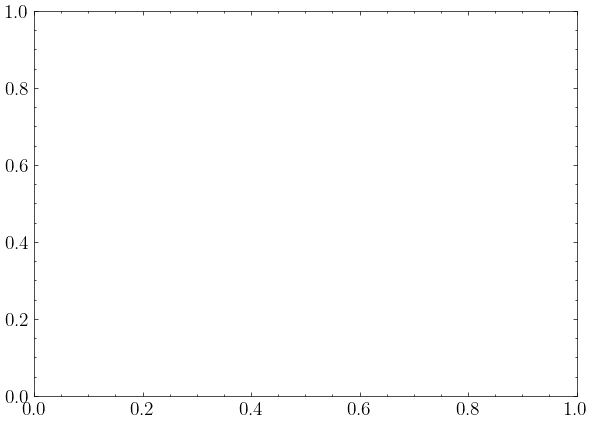

In [212]:
plt.figure(figsize=(7, 5))
plt.plot(np.cos(thetas), np.sin(thetas), '-', markersize=1)